In [17]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.svm import SVR

gold = yf.download('GC=F', '2022-03-01', '2024-03-01', auto_adjust=True)

print(gold)

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close  Volume
Date                                                                  
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516
...                 ...          ...          ...          ...     ...
2024-02-23  2026.000000  2038.599976  2014.900024  2038.599976      22
2024-02-26  2034.099976  2035.400024  2024.800049  2028.500000     143
2024-02-27  2035.900024  2035.900024  2034.000000  2034.000000     964
2024-02-28  2029.500000  2037.000000  2024.800049  2033.000000     581
2024-02-29  2034.300049  2049.800049  2034.300049  2045.699951     706

[504 ro

Chuyển Date thành Timestamp

In [18]:

gold['Timestamp'] = gold.index.map(pd.Timestamp.timestamp)
# gold.set_index('Date')
print(gold)

                   Open         High          Low        Close  Volume  \
Date                                                                     
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547   
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109   
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122   
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47   
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516   
...                 ...          ...          ...          ...     ...   
2024-02-23  2026.000000  2038.599976  2014.900024  2038.599976      22   
2024-02-26  2034.099976  2035.400024  2024.800049  2028.500000     143   
2024-02-27  2035.900024  2035.900024  2034.000000  2034.000000     964   
2024-02-28  2029.500000  2037.000000  2024.800049  2033.000000     581   
2024-02-29  2034.300049  2049.800049  2034.300049  2045.699951     706   

               Timestamp  
Date      

Tạo thêm các cột MA7, MA25, MA99

In [19]:
# Tính toán và tạo cột cho trung bình động 7 ngày (MA7)
gold['MA7'] = gold['Close'].rolling(window=7).mean()

# Tính toán và tạo cột cho trung bình động 25 ngày (MA25)
gold['MA25'] = gold['Close'].rolling(window=25).mean()

# Tính toán và tạo cột cho trung bình động 99 ngày (MA99)
gold['MA99'] = gold['Close'].rolling(window=99).mean()

# In ra DataFrame để kiểm tra kết quả
print(gold)


                   Open         High          Low        Close  Volume  \
Date                                                                     
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547   
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109   
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122   
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47   
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516   
...                 ...          ...          ...          ...     ...   
2024-02-23  2026.000000  2038.599976  2014.900024  2038.599976      22   
2024-02-26  2034.099976  2035.400024  2024.800049  2028.500000     143   
2024-02-27  2035.900024  2035.900024  2034.000000  2034.000000     964   
2024-02-28  2029.500000  2037.000000  2024.800049  2033.000000     581   
2024-02-29  2034.300049  2049.800049  2034.300049  2045.699951     706   

               Timestamp          MA7

In [20]:
# Thay thế các giá trị NaN bằng 0
gold.fillna(0, inplace=True)

# In ra DataFrame để kiểm tra kết quả
print(gold)


                   Open         High          Low        Close  Volume  \
Date                                                                     
2022-03-01  1908.300049  1942.400024  1903.800049  1942.400024     547   
2022-03-02  1945.599976  1948.199951  1919.800049  1920.900024     109   
2022-03-03  1930.500000  1940.300049  1924.800049  1934.400024     122   
2022-03-04  1937.000000  1970.900024  1935.599976  1965.099976      47   
2022-03-07  1989.000000  2001.099976  1963.000000  1993.900024    2516   
...                 ...          ...          ...          ...     ...   
2024-02-23  2026.000000  2038.599976  2014.900024  2038.599976      22   
2024-02-26  2034.099976  2035.400024  2024.800049  2028.500000     143   
2024-02-27  2035.900024  2035.900024  2034.000000  2034.000000     964   
2024-02-28  2029.500000  2037.000000  2024.800049  2033.000000     581   
2024-02-29  2034.300049  2049.800049  2034.300049  2045.699951     706   

               Timestamp          MA7

Chia tập train và tập test

In [21]:
X = gold[['Timestamp']]
y = gold['Close']

# Tạo một điểm chia dữ liệu giả định
split_point = int(len(gold) * 0.8)  # 80% là tập huấn luyện

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

MÔ HÌNH LINEAR REGRESSION

In [22]:

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)



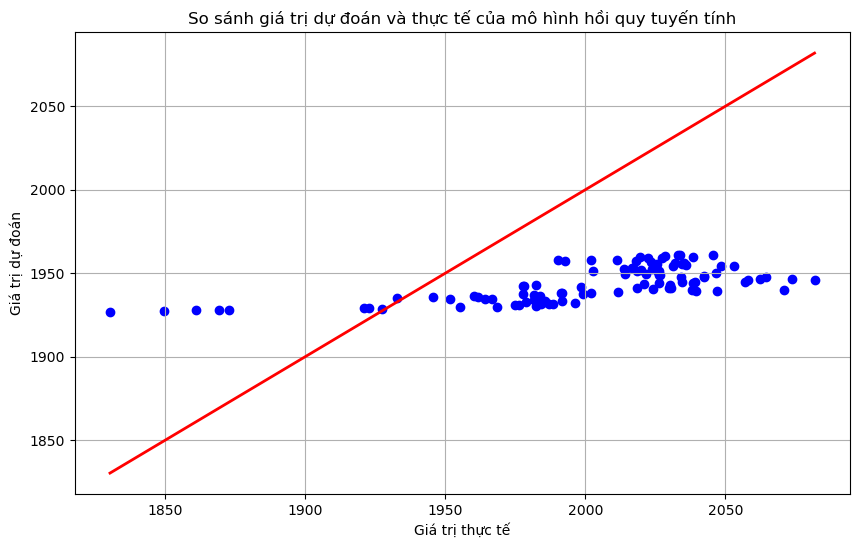

In [23]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ giá trị dự đoán và giá trị thực tế
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('So sánh giá trị dự đoán và thực tế của mô hình hồi quy tuyến tính')
plt.grid(True)
plt.show()


Đánh giá mô hình Linear Regressor

In [24]:
# Đánh giá hiệu suất của mô hình
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 5148.954773513512
Root Mean Squared Error (RMSE): 71.75621766448893
R-squared (R2): -1.3071717224556756


MÔ HÌNH SVR

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': [ 'rbf', 'poly', 'sigmoid']}

# Tìm kiếm tham số tốt nhất bằng Grid Search
grid_search = GridSearchCV(SVR(), param_grid, refit=True, verbose=2)
grid_search.fit(X_train, y_train)

# Tham số tốt nhất
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Dự đoán trên tập kiểm tra
y_pred = grid_search.predict(X_test)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

c:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\anaconda3\lib\site-packages\sklearn\base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "c:\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 789, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "c:\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
  File "c:\anaconda3\

[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................

c:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\anaconda3\lib\site-packages\sklearn\base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "c:\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 789, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "c:\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
  File "c:\anaconda3\

[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...................

c:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\anaconda3\lib\site-packages\sklearn\base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "c:\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 789, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "c:\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
  File "c:\anaconda3\

[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................

c:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\anaconda3\lib\site-packages\sklearn\base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "c:\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 789, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "c:\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
  File "c:\anaconda3\

[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...................

c:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\anaconda3\lib\site-packages\sklearn\base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "c:\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 789, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "c:\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
  File "c:\anaconda3\

[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................

c:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\anaconda3\lib\site-packages\sklearn\base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "c:\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 789, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "c:\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
  File "c:\anaconda3\

[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....................C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C

c:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\anaconda3\lib\site-packages\sklearn\base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "c:\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 789, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "c:\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
  File "c:\anaconda3\

[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................

c:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\anaconda3\lib\site-packages\sklearn\base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "c:\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 789, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "c:\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
  File "c:\anaconda3\

In [26]:

# Đánh giá hiệu suất của mô hình
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 19993.151823271874
Root Mean Squared Error (RMSE): 141.39714220334113
R-squared (R2): -7.958640453922595


In [27]:
# Xây dựng mô hình SVR
model = SVR(kernel='rbf', gamma=1, C=10)  # Sử dụng kernel phi tuyến tính
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá hiệu suất của mô hình
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 19134.80765900175
Root Mean Squared Error (RMSE): 138.32862198041934
R-squared (R2): -7.5740289218645


Mô hình PROPHET

In [28]:
# conda install libpython m2w64-toolchain -c msys2

In [29]:
# pip install --upgrade wheel

In [30]:
# pip install pystan

In [31]:
# conda install -c conda-forge prophet

In [32]:
import pandas as pd
from fbprophet import Prophet
import numpy as np
import matplotlib.pyplot as plt

def calculate_ma(df, window):
    return df['Close'].rolling(window=window).mean()

def calculate_boll(df, window):
    sma = df['Close'].rolling(window=window).mean()
    rolling_std = df['Close'].rolling(window=window).std()
    upper_band = sma + (2 * rolling_std)
    lower_band = sma - (2 * rolling_std)
    return upper_band, lower_band

def calculate_rsi(df, window):
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

def calculate_kd(df, window_slow, window_fast):
    low_min = df['Low'].rolling(window=window_slow).min()
    high_max = df['High'].rolling(window=window_slow).max()
    k = 100 * ((df['Close'] - low_min) / (high_max - low_min))
    d = k.rolling(window=window_fast).mean()
    return k, d

def calculate_sar(df, acceleration=0.02, maximum=0.2):
    high = df['High']
    low = df['Low']
    close = df['Close']
    sar = pd.Series(index=df.index)
    sar[0] = low[0]
    trend = 0
    ep = 0
    af = acceleration
    for i in range(1, len(df)):
        if trend == 0:
            if high[i - 1] > high[i] and low[i - 1] > low[i]:
                trend = 1
                sar[i] = low[i]
                ep = high[i]
                af = acceleration
            elif high[i - 1] < high[i] and low[i - 1] < low[i]:
                trend = -1
                sar[i] = high[i]
                ep = low[i]
                af = acceleration
        else:
            if trend == 1:
                if high[i] > ep:
                    sar[i] = sar[i - 1] + af * (ep - sar[i - 1])
                    sar[i] = min(sar[i], low[i - 1])
                    ep = high[i]
                    af = min(af + acceleration, maximum)
                else:
                    trend = -1
                    sar[i] = ep
                    sar[i] = min(sar[i], low[i - 1])
                    sar[i] = min(sar[i], low[i])
                    ep = low[i]
                    af = acceleration
            elif trend == -1:
                if low[i] < ep:
                    sar[i] = sar[i - 1] + af * (ep - sar[i - 1])
                    sar[i] = max(sar[i], high[i - 1])
                    ep = low[i]
                    af = min(af + acceleration, maximum)
                else:
                    trend = 1
                    sar[i] = ep
                    sar[i] = max(sar[i], high[i - 1])
                    sar[i] = max(sar[i], high[i])
                    ep = high[i]
                    af = acceleration
    return sar
# Load data
# Replace 'your_data.csv' with your own data file
df = gold

# Preprocess data (fill missing values, convert types, etc.)
# Replace any preprocessing steps here

# Calculate technical indicators
df['MA_50'] = calculate_ma(df, 50)
upper_band, lower_band = calculate_boll(df, 20)
df['Bollinger_Upper'] = upper_band
df['Bollinger_Lower'] = lower_band
df['RSI'] = calculate_rsi(df, 14)
k, d = calculate_kd(df, 14, 3)
df['Stochastic_Oscillator_K'] = k
df['Stochastic_Oscillator_D'] = d
df['Parabolic_SAR'] = calculate_sar(df)

# Selecting relevant columns (Prophet requires a DataFrame with 'ds' and 'y' columns)
data_prophet = df[['Date', 'Close', 'MA_50', 'Bollinger_Upper', 'Bollinger_Lower', 'RSI', 'Parabolic_SAR']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Prophet model training
prophet_model = Prophet()
prophet_model.add_regressor('MA_50')
prophet_model.add_regressor('Bollinger_Upper')
prophet_model.add_regressor('Bollinger_Lower')
prophet_model.add_regressor('RSI')
prophet_model.add_regressor('Parabolic_SAR')
prophet_model.fit(data_prophet)

# Generate future dates for forecasting
future = prophet_model.make_future_dataframe(periods=365)

# Calculate technical indicators for future dates
future['MA_50'] = calculate_ma(future, 50)
upper_band_future, lower_band_future = calculate_boll(future, 20)
future['Bollinger_Upper'] = upper_band_future
future['Bollinger_Lower'] = lower_band_future
future['RSI'] = calculate_rsi(future, 14)
k_future, d_future = calculate_kd(future, 14, 3)
future['Stochastic_Oscillator_K'] = k_future
future['Stochastic_Oscillator_D'] = d_future
future['Parabolic_SAR'] = calculate_sar(future)

# Make predictions
forecast = prophet_model.predict(future)

# Visualize results
prophet_model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Forecasted Close Price')
plt.show()


ModuleNotFoundError: No module named 'fbprophet'